In [1]:
import os  
import tensorflow as tf
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np 
import random


In [ ]:
'''
Submitted by - Pakhi Agarwal

IST 597: Foundations of Deep Learning
Problem 1: Univariate Regression

@author - Alexander G. Ororbia II and Ankur Mali

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <http://www.gnu.org/licenses/>.
'''



In [2]:
# NOTE: you will need to tinker with the meta-parameters below yourself (do not think of them as defaults by any means)
# meta-parameters for program
alpha = 0.015 # step size coefficient
eps = 0.00001 # controls convergence criterion
#n_epoch = 10000 # number of epochs (full passes through the dataset)
n_epoch = 1200 # number of epochs (full passes through the dataset)

# begin simulation

In [3]:
def regress(X, theta):
    # WRITEME: write your code here to complete the routine
    bias, weight = theta
    return bias + weight * X
    # return tf.add(bias, tf.matmul(weight, X))

In [4]:
def gaussian_log_likelihood(mu, y):
    # WRITEME: write your code here to complete the sub-routine
    gauss = tf.reduce_sum(tf.pow(mu - y,2))
    return -0.5 * gauss
    

In [5]:
def computeCost(X, y, theta): # loss is now Bernoulli cross-entropy/log likelihood
    # WRITEME: write your code here to complete the routine
    z = regress(X,theta)
    t = z-y
    b = t ** 2
    s = 2*len(X)
    a = (tf.reduce_sum (b))/s
    return a

In [6]:
def computeGrad(X, y, theta): 
    # WRITEME: write your code here to complete the routine
    # NOTE: you do not have to use the partial derivative symbols below, they are there to guide your thinking)
    z = regress(X,theta)
    t = z-y
    
    dL_dfy = None # derivative w.r.t. to model output units (fy)
    
    dL_db = (tf.reduce_sum(t))/(len(X)) # derivative w.r.t. model weights w
    dL_dw = (tf.matmul(tf.transpose(X),(t)))/(len(X)) # derivative w.r.t model bias b
    
    nabla = (dL_db, dL_dw) # nabla represents the full gradient
    return nabla

-------- Information About DATA --------
               X          Y
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000
________________________________________


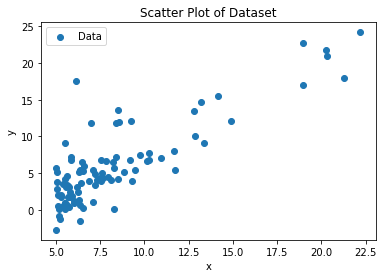

In [7]:
path = os.getcwd() + '/prob1.dat'  
data = pd.read_csv(path, header=None, names=['X', 'Y']) 

# display some information about the dataset itself here

################################################

print '-------- Information About DATA --------'
print data.describe()
print '________________________________________'

###############################################

# WRITEME: write your code here to print out information/statistics about the data-set "data" using Pandas (consult the Pandas documentation to learn how)

##################################

#calculating mean of input
mean_X = data['X'].mean()
#calculating variance of input
var_X = data['X'].var() 

#################################

# WRITEME: write your code here to create a simple scatterplot of the dataset itself and print/save to disk the result

#####################################################

plt.figure()
plt.scatter(data['X'], data['Y'], label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.title("Scatter Plot of Dataset")
plt.savefig(os.getcwd() + '/DLAssign1Problem1/ Scatter Plot of Dataset')

######################################################

In [8]:
# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 

In [9]:
# convert from data frames to numpy matrices
X = np.array(X.values)  
y = np.array(y.values)

In [10]:
#TODO convert np array to tensor objects

#TODO create an placeholder variable for X(input) and Y(output)

x_tensor = tf.placeholder(dtype=tf.float64, shape=(None,X.shape[1]))
y_tensor = tf.placeholder(dtype=tf.float64, shape=(None, y.shape[1]))

# convert to numpy arrays and initalize the parameter array theta 

################################################################

random.seed(1611189)
w0 = random.random()
b0 = random.random()

w = tf.constant(w0, dtype=tf.float64)
b = tf.constant(b0, dtype=tf.float64)
# b = tf.convert_to_tensor([0]) # converting to tensor
theta = (b, w)

################################################################

-1 L = Tensor("div:0", shape=(), dtype=float64)
 0 L = 7.14759501263
 20 L = 5.84300986851
 40 L = 5.70279468292
 60 L = 5.57697169666
 80 L = 5.46406364176
 100 L = 5.36274488244
 120 L = 5.27182585104
 140 L = 5.19023908145
 160 L = 5.11702667621
 180 L = 5.05132905992
 200 L = 4.99237488719
 220 L = 4.9394719863
 240 L = 4.89199923259
 260 L = 4.8493992559
 280 L = 4.81117189658
 300 L = 4.77686833319
 320 L = 4.74608581297
 340 L = 4.71846292318
 360 L = 4.6936753478
 380 L = 4.67143205979
 400 L = 4.65147190418
 420 L = 4.63356053193
 440 L = 4.61748764842
 460 L = 4.60306454444
 480 L = 4.59012188059
 500 L = 4.57850769908
 520 L = 4.56808563962
 540 L = 4.55873333846
 560 L = 4.55034099168
 580 L = 4.54281006606
 600 L = 4.53605214218
 620 L = 4.52998787631
 640 L = 4.52454606887
 660 L = 4.51966282844
 680 L = 4.51528082167
 700 L = 4.51134860009
 720 L = 4.50781999611
 740 L = 4.50465358095
 760 L = 4.50181217821
 780 L = 4.49926242744
 800 L = 4.49697439242
 820 L = 4.4949212

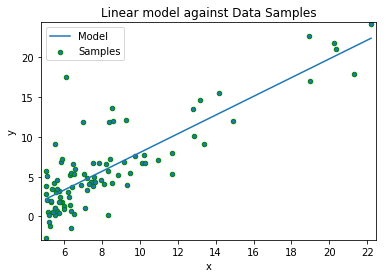

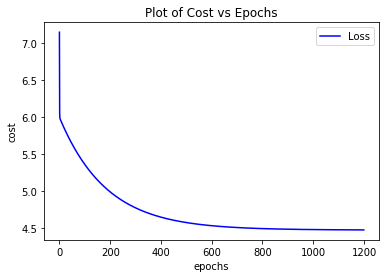

In [11]:
L = computeCost(X, y, theta)
print("-1 L = {0}".format(L))
L_best = L
i =0 
cost = [] # you can use this list variable to help you create the loss versus epoch plot at the end(if you want)
with tf.Session() as sess:
    while i < n_epoch:
        
        dL_db0, dL_dw0 = computeGrad(X, y, theta)
        dL_db = dL_db0.eval()
        dL_dw = dL_dw0.eval()
        #use feeddict to pass variables 
        b = theta[0]
        w = theta[1]
        # update rules go here...
        # WRITEME: write your code here to perform a step of gradient descent & record anything else desired for later
        b = b - alpha * dL_db
        w = w - alpha * dL_dw
        theta = (b,w) #overwriting theta
        # (note: don't forget to override the theta variable...)
        L = computeCost(X, y, theta).eval() # track our loss after performing a single step
        if L < eps:
            break
        else:
            cost.append(L)
        if i % 20 == 0:
            print(" {0} L = {1}".format(i,L))
        i += 1
        
    #TODO
    # print parameter values found after the search
    print ('w=',w.eval())
    print ('b=',b.eval())

    #Save everything into saver object in tensorflow

    #Visualize using tensorboard

    kludge = 0.25 # helps with printing the plots (you can tweak this value if you like)
    # visualize the fit against the data
    X_test = tf.linspace(data.X.min(), data.X.max(), 100)
    X_test = tf.expand_dims(X_test, axis=1)

    plt.figure()
    
    ttt = sess.run(regress(X_test, theta))
    X_test0 = X_test.eval()
    
    
    
    plt.plot(X_test0, ttt, label="Model")
    plt.scatter(X[:,0], y, edgecolor='g', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear model against Data Samples")
    plt.xlim((np.amin(X_test0) - kludge, np.amax(X_test0) + kludge))
    plt.ylim((np.amin(y) - kludge, np.amax(y) + kludge))
    plt.legend(loc="best")
    # WRITEME: write your code here to save plot to disk (look up documentation/inter-webs for matplotlib)
    plt.savefig(os.getcwd() + '/DLAssign1Problem1/Linear model')
    plt.show()
    
    
    # visualize the loss as a function of passes through the dataset
    # WRITEME: write your code here create and save a plot of loss versus epoch
    plt.figure()
    plt.plot(cost, color = 'b', label = "Loss")
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.title("Plot of Cost vs Epochs")
    plt.legend(loc="best")
    plt.savefig(os.getcwd() + '/DLAssign1Problem1/Cost vs Epoch')
    plt.show() # convenience command to force plots to pop up on desktop
